# Dealer Changeover PoC: Prescriptive Analytics Approach

Authors: Vusal Babashov & Evan Sinukoff

## Business Problem

Given the string and store information, allocate resources efficiently to strings and stores. 

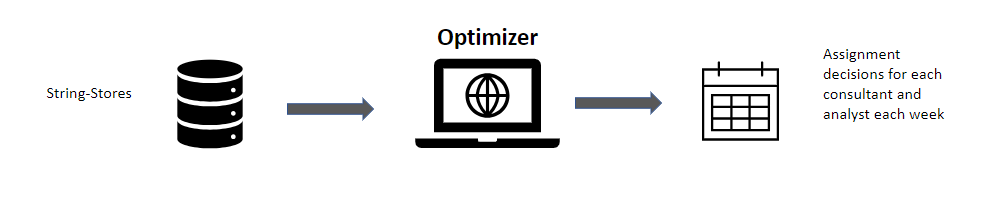

## Model

 - Mixed Integer Programming
 - Python, Gurobi

Indices and Sets

- $i \in I$:  Index and set of consultant and analysts
- $k \in K$:  Index and set of stores
- $s \in S$:  Index and set of strings
- $n \in N$:  Index and set of weeks

- $I(k)$:  Set of people who can work in store $k$ (i.e., language, availability)
- $I(s)$:  Set of people who can do all stores in the string $s$ (i.e., language and avaiability on $T_k$)
- $I(n)$:  Set of people who are avaialable on week $n$ (i.e., vacations and blackout weeks)
- $I_c$:   Set of consultants
- $K(s)$:  Set of stores that belong string $s$ 
- $N(k)$:  Set of weeks in which store $k$ asset counts can be done (i.e., between 4 and 8 weeks prior to changeover date)


### Parameters

- $T_{k}$ $\in\mathbb{N}$: Changeover week at a store $k\in K$
- $D_{k}$ $\in\mathbb{N}$ : Number of person-weeks required for asset listing at store $k \in K$  (i.e., one person for every 10,000 sf)
- $r_{ik}$: Distance between home province for consultant/analyst $i$ and store $k$ 

### Decision Variables:

- $y_{is} \in \{0,1\}$:   Equals 1 if consultant $i\in I$ is assigned to string $s \in S$, 0 otherwise
- $x_{ik} \in \{0,1\}$:   Equals 1 if consultant $i\in I_c$ is assigned to changeover at store $k \in K$, 0 otherwise
<!-- - $Extra_{ik} \in \{0,1\}$:   Equals 1 if consultant $i\in I_c$ is assigned to changeover at store $k \in K$, 0 otherwise -->
- $u_{ikn} \in \{0,1\}$:  Equals 1 if consultant/analysts $i\in I$, is assigned to asset counts at store $k \in K$ on week $n \in N$, 0 otherwise
- $z_{kn} \in\mathbb{N}$: Number of extra staff required to satisfy the requirements of store $k \in K$ asset counts on week $n \in N$
- $w$ : Auxilary variable to track the number of extra staff


### Objective Function

\begin{equation}
\text{Min} \quad \sum_{i \in I(k)} \sum_{s \in S} y_{is}
\end{equation}

Third Party Staff

\begin{equation}
\text{Min} \quad w 
\end{equation}

Total Distance

\begin{equation}
\text{Min} \quad \sum_{i \in I(k)} \sum_{k}  \left (r_{ik} t_{ik}\right)
\end{equation}

Fairness in Workload/Assignments

\begin{equation}
\text{Min} \quad \{\text{maxAssign} - \text{minAssign} \}
\end{equation}

### Constraints

#### 1a. Staffing Requirements: Person-Week Requirement For Store Asset Counts

\begin{equation}
\sum_{n \in N(k) } \left( z_{kn}  + \sum_{i \in I(k) \cap I(n) } u_{ikn} \right)  = D_{k} \quad \forall\; k \in K
\end{equation}

#### 1b. Ensure that analyst is not there alone on a given asset count week and store. e.g., There is always a consultant 

\begin{equation}
\sum_{i \in I(k) \cap I(n) } u_{ikn}   <= M* \sum_{i \in I(k) , I_c } u_{ikn}\quad \forall\; k \in K, n \in N(k)
\end{equation}

#### 2. Max One-Store Asset Count Per Week

\begin{equation}
\sum_{k \in K} u_{ikn}  <= 1 \quad \forall\; i \in I (k), n \in N(k), 
\end{equation}

#### 3. Ensure either Asset Counts or Changeover on the Same Week

\begin{equation}
u_{ik'n} \le (1 - x_{ik})  \quad \forall\; i \in I, k,k' \in K\,, k' \ne k, n = T_k
\end{equation}

#### 4. One Consultant Per Each Store Changeover

\begin{equation}
\sum_{i \in I(k) \cap I_c \cap I(T_k) } x_{ik} = 1 \quad \forall\; k \in K, \;
\end{equation}

#### 5. Max One Store per Consultant on Each Changeover Week

\begin{equation}
\sum_{k \in K(T_k)} x_{ik} <= 1 \quad \forall\; i \in I(k) \cap I_c \cap I(T_k) , \;
\end{equation}

Applies to stores with the same changeover weeks 

#### 6. Changeover - Asset Count Relationship

\begin{equation}
x_{ik} <= \sum_{n \in N(k)} u_{ikn} \quad \forall\; i \in I(k), k \in K
\end{equation}

#### 7.Count the number of consultants assigned to the string

\begin{equation}
x_{ik} <= y_{is} \quad \forall\; i \in I(k), k \in K(s), s \in S
\end{equation}

---

#### 8. Auxilary Constraint: Total Additional Resources Needed

\begin{equation}
\sum_{k}\sum_{n \in N(k)}  z_{kn}=  w
\end{equation}

#### 9.Auxilary Constraint: Assignment indicator for distance 

\begin{equation}
 \sum_{n\in N(k)} u_{ikn} <= t_{ik}   \quad \forall\; i \in I (k), k \in K
\end{equation}

#### 10. Auxilary Constraint: Fairness/Total Workload

\begin{equation}
\sum_{k \in K} \sum_{n\in N(k)} u_{ikn}  = \text{totAssignments(i)} \quad \forall\; i \in I (k)
\end{equation}

\begin{equation}
\text{maxNumAssign} = \text{Max} \{\text{totAssignments}(i):  \quad \forall\; i \in I \}
\end{equation}
\begin{equation}
\text{minNumAssign} = \text{Min} \{\text{totAssignments}(i):  \quad \forall\; i \in I \}  
\end{equation}